### Random walk  generation 

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [69]:
def gbm0(n_years=10, n_scenarios=1000, 
         mu=0.07, sigma=0.15, steps_per_year=12, s_0=100):
    """
    Evolution of a Stock Price using a Geometric Brownian Motion model
    """
    dt = 1 / steps_per_year
    n_steps = int(n_years * steps_per_year)
    xi = np.random.normal(size=(n_steps, n_scenarios))
    rets = mu * dt + sigma * np.sqrt(dt) * xi
    rets = pd.DataFrame(rets)
    prices = s_0 * (1 + rets).cumprod()
    return prices

In [70]:
p = gbm0(10, n_scenarios=3)

In [71]:
p.head()

,0,1,2
0,98.052256,97.113478,94.164538
1,107.008408,99.665608,91.416564
2,104.546838,102.571401,93.899077
3,106.342845,98.575269,93.529540
4,116.145425,104.146309,98.580297


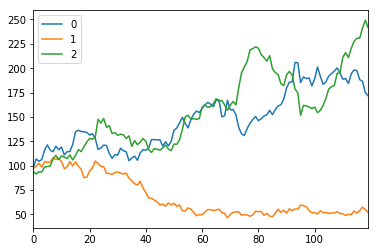

In [72]:
p.plot()
plt.show()

In [73]:
p = gbm0(n_years=10, n_scenarios=1000)
p.head()

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,106.042384,99.211145,103.021664,106.181239,99.705255,90.597567,102.570631,101.590007,98.935574,98.447826,...,100.354813,97.837874,100.651737,98.138921,102.024842,101.420515,103.017794,106.509956,97.731167,96.761428
1,105.069173,94.228474,99.867162,106.052441,99.404139,91.785577,105.269412,102.066661,96.338827,104.511459,...,104.825362,94.716574,101.348820,95.301057,100.407484,97.352410,102.309287,106.558999,93.925187,102.416915
2,105.106453,95.179855,94.545112,107.773771,98.216619,90.139505,104.727443,107.601184,101.341570,100.015666,...,102.796680,90.532530,106.744211,94.606231,103.046316,105.656131,103.399438,98.920864,91.588888,106.136071
3,104.498506,104.000260,96.857099,96.626377,97.902291,93.267467,104.549670,108.895614,88.768207,95.455086,...,105.298881,96.330292,104.954055,99.041272,95.678780,99.252146,104.088083,95.265774,88.183554,98.852749
4,105.388484,106.536325,97.078672,98.478466,107.036951,87.956424,104.573330,111.441313,87.649154,98.815593,...,109.070429,93.866560,103.427125,96.998447,90.382637,97.540558,98.916281,94.047485,88.716548,98.087961


In [85]:
def gbm1(n_years=10, n_scenarios=1000, 
         mu=0.07, sigma=0.15, steps_per_year=12, s_0=100):
    """
    Evolution of a Stock Price using a Geometric Brownian Motion model
    """
    dt = 1 / steps_per_year
    n_steps = int(n_years * steps_per_year)
    rets_plus_1 = np.random.normal(loc=(1+mu*dt), 
                            scale=(sigma*np.sqrt(dt)),
                            size=(n_steps, n_scenarios))
    prices = s_0 * pd.DataFrame(rets_plus_1).cumprod()
    return prices

In [75]:
%timeit gbm0(n_years=5, n_scenarios=1000)

362 ms ± 8.35 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [76]:
%timeit gbm1(n_years=5, n_scenarios=1000)

187 ms ± 10.8 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


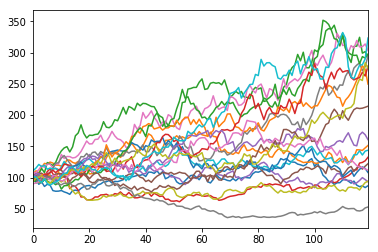

In [87]:
gbm1(n_years=10, n_scenarios=20).plot(legend=False)

In [86]:
gbm1(n_scenarios=10).head()

,0,1,2,3,4,5,6,7,8,9
0,97.580593,100.989791,97.270926,100.112886,101.993207,97.712238,96.697537,92.569123,102.549534,101.300307
1,97.072272,100.519536,98.343368,107.442306,94.760377,96.624778,100.151090,94.078980,99.968446,104.434955
2,100.808207,102.078988,95.506899,115.320063,98.847036,93.227618,98.942438,89.410184,100.150524,110.553117
3,99.249349,102.615121,92.650415,114.570338,97.953511,99.219278,94.998647,88.807644,93.409614,104.640090
4,98.457348,104.417528,100.032803,116.986487,100.096237,98.654768,99.189456,87.784572,92.784022,108.304251


In [81]:
def gbm(n_years=10, n_scenarios=1000, 
         mu=0.07, sigma=0.15, steps_per_year=12, s_0=100):
    """
    Evolution of a Stock Price using a Geometric Brownian Motion model
    """
    dt = 1 / steps_per_year
    n_steps = int(n_years * steps_per_year)
    rets_plus_1 = np.random.normal(loc=(1+mu*dt), 
                            scale=(sigma*np.sqrt(dt)),
                            size=(n_steps, n_scenarios))
    rets_plus_1[0] = 1
    prices = s_0 * pd.DataFrame(rets_plus_1).cumprod()
    return prices

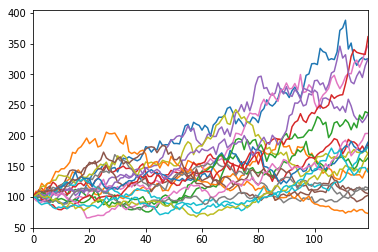

In [88]:
gbm(n_years=10, n_scenarios=20).plot(legend=False)

In [89]:
gbm(n_scenarios=10).head()

,0,1,2,3,4,5,6,7,8,9
0,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
1,105.377230,98.835613,104.741091,103.516854,106.099800,96.859975,99.405781,108.846415,96.364822,103.349799
2,98.870806,98.992546,110.448989,101.392374,101.095618,97.697615,97.630465,108.326694,90.528419,103.085783
3,95.858609,94.661489,118.096052,103.183575,95.878970,90.125723,96.707599,110.785229,94.143480,107.972956
4,91.206367,91.753106,114.828721,105.133973,92.178693,94.477962,96.348586,107.100548,98.757682,106.506880
